# Classification Task

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')

features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)

In [3]:
tracks.head() #Display the first 5 objects of the dataset

track_id  album_date_released_year  artist_location  album_information  \
0         2                      2009             1275               1612   
1         3                      2009             1275               1612   
2         5                      2009             1275               1612   
3        10                      2008              325                310   
4        20                      2009              498              10477   

   artist_bio  artist_website  album_tracks  album_title  track_genres  \
0        2004            2225             7          500          2355   
1        2004            2225             7          500          2355   
2        2004            2225             7          500          2355   
3        1623            1053             2         2119           713   
4        4679            5705            13         8103          4300   

   track_bit_rate  artist_name  artist_comments  album_date_created_day  \
0          256000          279                0                      26   
1          256000          279                0                      26   
2          256000          279                0                      26   
3          192000         7052                3                      26   
4          256000         9090                2                      26   

   album_date_released_day  album_tags  \
0                        5        2285   
1                        5        2285   
2                        5        2285   
3                        6        2285   
4                        6        2285   

   Attribution-Noncommercial-Share Alike 3.0 United States  
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99404 entries, 0 to 99403
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_date_released_year                                 99404 non-null  int64
 2   artist_location                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int64
 4   artist_bio                                               99404 non-null  int64
 5   artist_website                                           99404 non-null  int64
 6   album_tracks                                             99404 non-null  int64
 7   album_title                                              99404 non-null  int64
 8   track_genres                                  

### Data Partitioning

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 

Split the dataset into 70% train and 30% test

In [6]:
attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [7]:
X_train.shape, X_test.shape

((69582, 15), (29822, 15))

In [8]:
tracks[class_name].value_counts()

0    81724
1    17680
Name: Attribution-Noncommercial-Share Alike 3.0 United States, dtype: int64

In [9]:
15260/(15260+91226)

0.14330522322183198

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

Build the decision tree

Parameters:
* **criterion** (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
* **max_depth** (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split** (default 2): The minimum number of samples required to split an internal node.
* **min_samples_leaf** (default 1): The minimum number of samples required to be at a leaf node.

In [11]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Output:
* **feature\_importances_**: The feature importances. The higher, the more important the feature.
* **tree_**: The underlying Tree object.

Features Importance

In [12]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

track_id 0.15246914079248913
album_date_released_year 0.06871276638561014
artist_location 0.08935042662219071
album_information 0.07831691141413308
artist_bio 0.06742256733585009
artist_website 0.07570930569963477
album_tracks 0.07389952227522054
album_title 0.07866662275313104
track_genres 0.07546234320381519
track_bit_rate 0.03698189758970202
artist_name 0.0734917402905271
artist_comments 0.023078913322693653
album_date_created_day 0.05603652808505709
album_date_released_day 0.030000987822707794
album_tags 0.020400326407237414


In [13]:
#Create a DataFrame for feature importances using a Dictionary
importances = {'feature_name': attributes, 'feature_importance': clf.feature_importances_}
importance_tracks = pd.DataFrame(importances)

#Sort the DataFrame in order decreasing feature importance
importance_tracks.sort_values(by=['feature_importance'], ascending=False, inplace=True)

Text(0, 0.5, 'FEATURE NAMES')

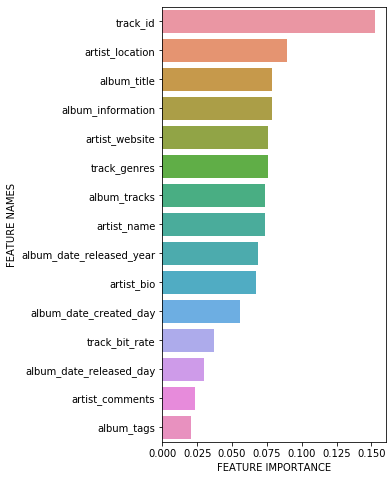

In [14]:
plt.figure(figsize=(4,8))
sns.barplot(x=importance_tracks['feature_importance'], y=importance_tracks['feature_name'])
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

Visualize the decision tree

In [15]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.25364 to fit



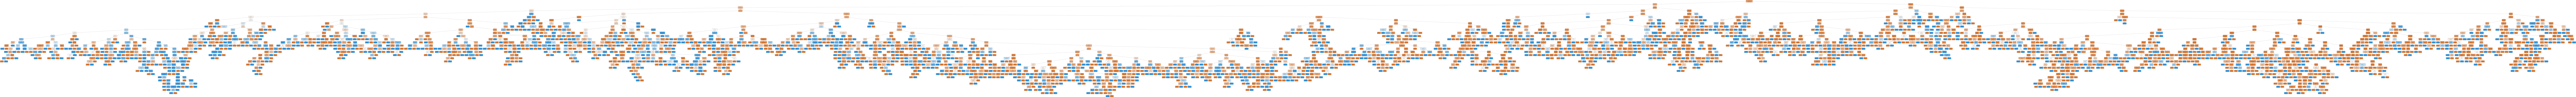

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=attributes, 
                                class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_], 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

#### Analyze the classification performance

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

Apply the decision tree on the training set

In [18]:
y_pred = clf.predict(X_train)

Evaluate the performance

In [19]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred))
print('Train F1-score %s' % f1_score(y_train, y_pred, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1.]
Train Precision [1. 1.]
Train Recall [1. 1.]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57206
           1       1.00      1.00      1.00     12376

    accuracy                           1.00     69582
   macro avg       1.00      1.00      1.00     69582
weighted avg       1.00      1.00      1.00     69582



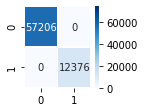

In [20]:
print(classification_report(y_train, y_pred))
cf_matrix_train = confusion_matrix(y_train, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74540, ax=ax)
plt.show()

Apply the decision tree on the test set and evaluate the performance

In [21]:
y_pred = clf.predict(X_test)

Test Accuracy 0.9841392260747099
Test F1-score [0.99034241 0.95565764]
Test Precision [0.99153686 0.9504009 ]
Test Recall [0.98915083 0.96097285]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24518
           1       0.95      0.96      0.96      5304

    accuracy                           0.98     29822
   macro avg       0.97      0.98      0.97     29822
weighted avg       0.98      0.98      0.98     29822



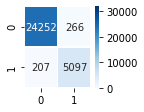

In [22]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31946, ax=ax)
plt.show()

Draw ROC curve

In [23]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

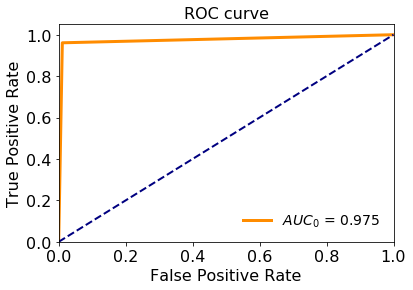

In [24]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [25]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

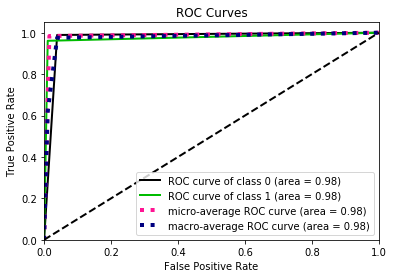

In [26]:
plot_roc(y_test, y_score)
plt.show()

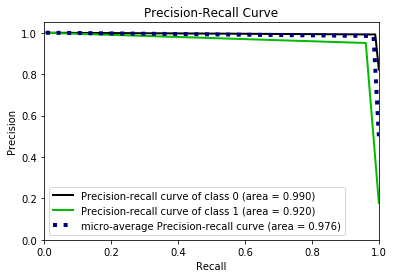

In [27]:
plot_precision_recall(y_test, y_score)
plt.show()

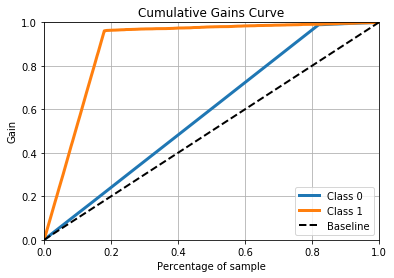

In [28]:
plot_cumulative_gain(y_test, y_score)
plt.show()

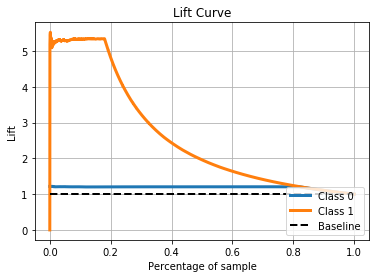

In [29]:
plot_lift_curve(y_test, y_score)
plt.show()

#### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

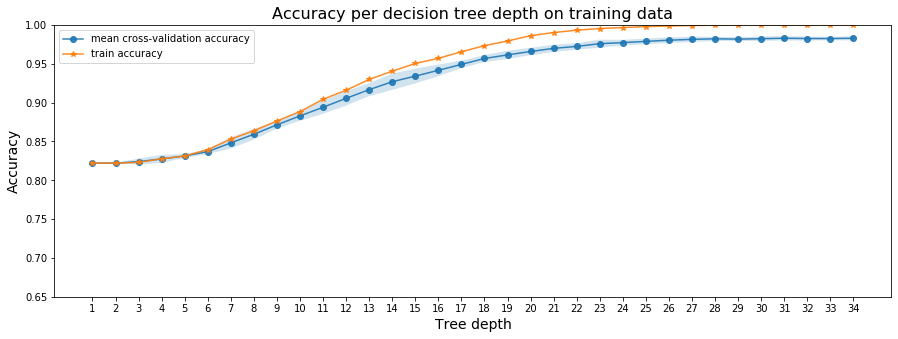

In [31]:
# Function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(0.65, 1)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,35)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

Tuning hyper-parameters by Randomized Search Cross Validation

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [14]:
param_list = {'max_depth': [None] + list(np.arange(2, 40)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'criterion': ['gini', 'entropy']
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                   n_iter=100, cv=5, random_state=0)
random_search.fit(X, y)
clf = random_search.best_estimator_

In [15]:
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.529 (std: 0.363)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 50, 'max_depth': 2, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 0.529 (std: 0.363)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 30, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.322 (std: 0.275)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 20, 'max_depth': 3, 'criterion': 'entropy'}



#### Decision Tree Classifier with Optimizied Parameters

In [56]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=2,
                             min_samples_split=30,
                             min_samples_leaf=50,
                             random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, min_samples_split=30,
                       random_state=0)

In [57]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

track_id 0.25661279615718713
album_date_released_year 0.6837024167289867
artist_location 0.0
album_information 0.0
artist_bio 0.0
artist_website 0.0
album_tracks 0.0
album_title 0.0
track_genres 0.0
track_bit_rate 0.05968478711382613
artist_name 0.0
artist_comments 0.0
album_date_created_day 0.0
album_date_released_day 0.0
album_tags 0.0


In [58]:
#Create a DataFrame for feature importances using a Dictionary
importances = {'feature_name': attributes, 'feature_importance': clf.feature_importances_}
importance_tracks = pd.DataFrame(importances)

#Sort the DataFrame in order decreasing feature importance
importance_tracks.sort_values(by=['feature_importance'], ascending=False, inplace=True)

Text(0, 0.5, 'FEATURE NAMES')

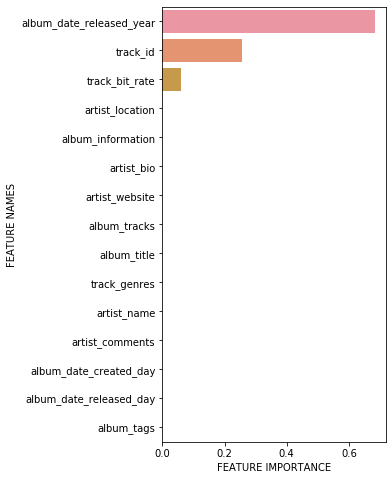

In [59]:
plt.figure(figsize=(4,8))
sns.barplot(x=importance_tracks['feature_importance'], y=importance_tracks['feature_name'])
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

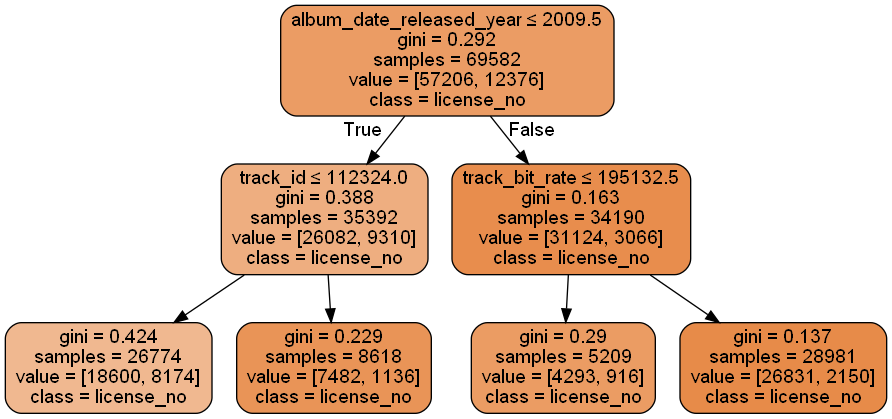

In [60]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=attributes, 
                                class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_], 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [61]:
y_pred = clf.predict(X_train)

Train Accuracy 0.8221379092293984
Train F1-score [0.90238824 0.        ]
Train Precision [0.82213791 0.        ]
Train Recall [1. 0.]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     57206
           1       0.00      0.00      0.00     12376

    accuracy                           0.82     69582
   macro avg       0.41      0.50      0.45     69582
weighted avg       0.68      0.82      0.74     69582



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classificati

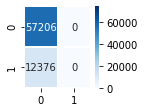

In [62]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred))
print('Train F1-score %s' % f1_score(y_train, y_pred, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred, average=None))

print(classification_report(y_train, y_pred))
cf_matrix_train = confusion_matrix(y_train, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

In [63]:
y_pred = clf.predict(X_test)

Test Accuracy 0.8221447253705318
Test F1-score [0.90239234 0.        ]
Test Precision [0.82214473 0.        ]
Test Recall [1. 0.]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classificati

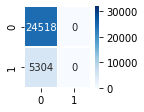

In [64]:
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Precision %s' % precision_score(y_test, y_pred, average=None))
print('Test Recall %s' % recall_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cf_matrix_test = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_test, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=31973, ax=ax)
plt.show()

In [65]:
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

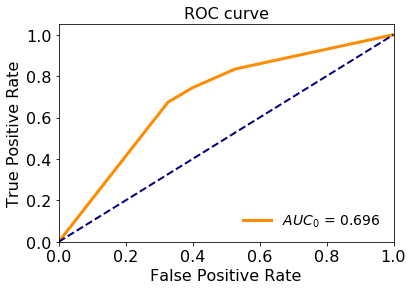

In [66]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

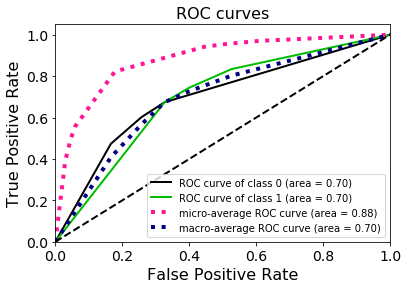

In [67]:
plot_roc(y_test, y_score)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curves', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

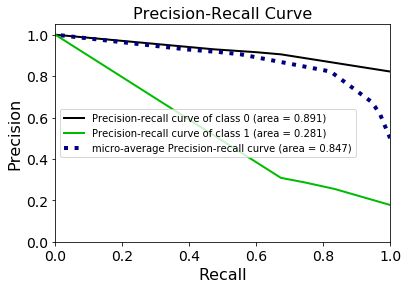

In [68]:
plot_precision_recall(y_test, y_score)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

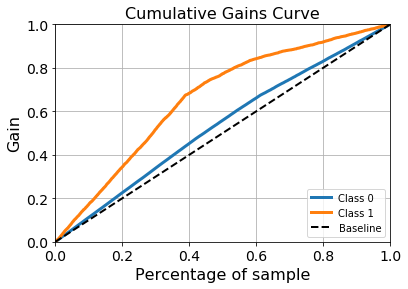

In [69]:
plot_cumulative_gain(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Gain', fontsize=16)
plt.title('Cumulative Gains Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

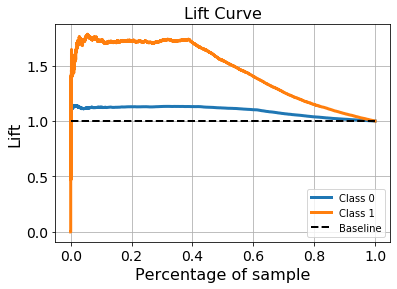

In [70]:
plot_lift_curve(y_test, y_score)
plt.xlabel('Percentage of sample', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift Curve', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [71]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=2,
                             min_samples_split=10,
                             min_samples_leaf=30,
                             random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=30,
                       min_samples_split=10, random_state=0)

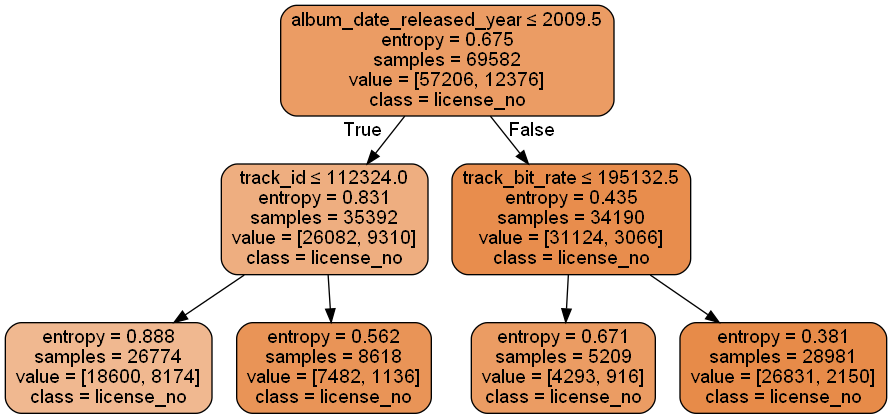

In [72]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=attributes, 
                                class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_], 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [73]:
y_pred = clf.predict(X_train)

Train Accuracy 0.8221379092293984
Train F1-score [0.90238824 0.        ]
Train Precision [0.82213791 0.        ]
Train Recall [1. 0.]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     57206
           1       0.00      0.00      0.00     12376

    accuracy                           0.82     69582
   macro avg       0.41      0.50      0.45     69582
weighted avg       0.68      0.82      0.74     69582



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classificati

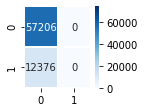

In [74]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred))
print('Train F1-score %s' % f1_score(y_train, y_pred, average=None))
print('Train Precision %s' % precision_score(y_train, y_pred, average=None))
print('Train Recall %s' % recall_score(y_train, y_pred, average=None))

print(classification_report(y_train, y_pred))
cf_matrix_train = confusion_matrix(y_train, y_pred)

f,ax = plt.subplots(figsize=(1.5,1.5))
sns.heatmap(cf_matrix_train, annot=True, cmap="Blues", linewidths=0.5,
            linecolor="white", fmt="", vmin=0, vmax=74601, ax=ax)
plt.show()

In [75]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=1,
                             min_samples_split=30,
                             min_samples_leaf=50,
                             random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=50,
                       min_samples_split=30, random_state=0)

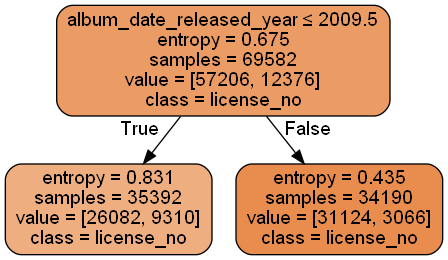

In [76]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=attributes, 
                                class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_], 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [77]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3,
                             min_samples_split=30,
                             min_samples_leaf=20,
                             random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       min_samples_split=30, random_state=0)

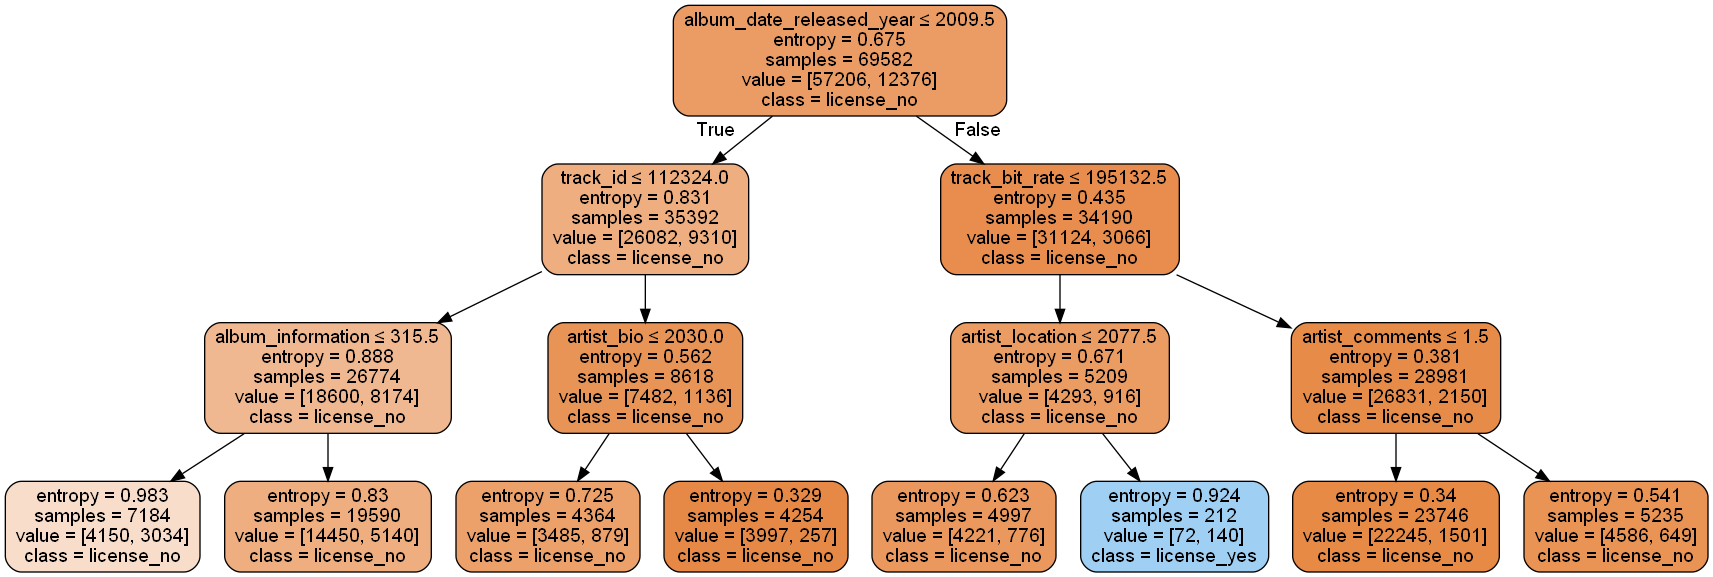

In [78]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=attributes, 
                                class_names=['license_yes' if x == 1 else 'license_no' for x in clf.classes_], 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())